
# ***Exploration and Cleaning of the Transactions Table***






In [1]:
import pandas as pd
# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

In [2]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import os
from pathlib import Path




In [3]:
#from google.colab import auth
#auth.authenticate_user()
#from google.cloud import bigquery
#from pandas_gbq import read_gbq


#project_id = "data-analytics-bootcamp-363212"

#query = '''
#SELECT *
#FROM `data-analytics-bootcamp-363212.neo_bank.transactions`
#'''

#df_transactions = read_gbq(query, project_id=project_id)

In [4]:
#os.makedirs("/content/drive/MyDrive/Documents", exist_ok=True)

#df_transactions.to_csv(
 #   "/content/drive/MyDrive/Documents/eval_transactions.csv",
  #  index=False)

#print("Saved to Google Drive Documents folder")

In [5]:
#df_transactions.to_csv("eval_transactions.csv", index=False)

#from google.colab import files
#files.download("eval_transactions.csv")

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
df_transactions = pd.read_csv(
    "eval_transactions.csv"
)

df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_505,TOPUP,AED,298.62,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_4773,2018-08-02 09:41:07.426363+00:00
1,transaction_1755379,EXCHANGE,AED,3.51,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_10435,2018-09-06 10:23:15.807148+00:00
2,transaction_1667,EXCHANGE,AED,0.05,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_397,2018-05-16 06:09:28.063037+00:00
3,transaction_1429,EXCHANGE,AED,24.14,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4399,2018-12-19 20:22:03.550130+00:00
4,transaction_345,EXCHANGE,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1731,2018-10-27 13:29:56.524826+00:00


In [8]:
df_transactions["transactions_type"].value_counts()

,count
transactions_type,
CARD_PAYMENT,1475780
TRANSFER,500409
TOPUP,388331
EXCHANGE,159148
ATM,93675
CASHBACK,82789
FEE,23659
CARD_REFUND,11962
TAX,2829


In [9]:
df_transactions.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740075 entries, 0 to 2740074
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   transaction_id         2740075 non-null  object 
 1   transactions_type      2740075 non-null  object 
 2   transactions_currency  2740075 non-null  object 
 3   amount_usd             2740075 non-null  float64
 4   transactions_state     2740075 non-null  object 
 5   ea_cardholderpresence  1569481 non-null  object 
 6   ea_merchant_mcc        1581417 non-null  float64
 7   ea_merchant_city       1581281 non-null  object 
 8   ea_merchant_country    1581096 non-null  object 
 9   direction              2740075 non-null  object 
 10  user_id                2740075 non-null  object 
 11  created_date           2740075 non-null  object 
dtypes: float64(2), object(10)
memory usage: 250.9+ MB


In [10]:
df_transactions.nunique()

,0
transaction_id,2740075
transactions_type,10
transactions_currency,35
amount_usd,48548
transactions_state,6
ea_cardholderpresence,3
ea_merchant_mcc,664
ea_merchant_city,63253
ea_merchant_country,198
direction,2


In [11]:
df_transactions.columns = df_transactions.columns.str.lower().str.replace(" ", "_")
text_cols = df_transactions.select_dtypes(include='object').columns

for col in text_cols:
    df_transactions[col] = (df_transactions[col].str.lower() .str.strip().str.replace(r'\s+', '_', regex=True) .str.replace(r'[^\w]', '', regex=True))

In [12]:
df_transactions["ea_merchant_city"] = (
    df_transactions["ea_merchant_city"]
    # 1) fake NaNs
    .replace(
        ["nan", "Nan", "NAN", "none", "None", "null", "NULL", "", " "],
        pd.NA
    )
    .fillna("Not Applicable")
    # 2) cleaning
    .astype(str)
    .str.lower()
    .str.replace(r'\b\d{2}-\d{3}\b', '', regex=True)
    .str.replace(r'[_\d]+', ' ', regex=True)
    .str.replace(r'^\s*-+', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
    # 3) numeric-only OR empty after cleaning → Not Applicable
    .replace(r'^\d+$', "Not Applicable", regex=True)
    .replace(r'^$', "Not Applicable", regex=True)
)


In [13]:
!pip install pycountry

In [14]:
import pycountry

def alpha3_to_alpha2(code):
    try:
        return pycountry.countries.get(alpha_3=code).alpha_2
    except:
        return None

df_transactions["merchant_country"] = (
    df_transactions["ea_merchant_country"]
    .apply(alpha3_to_alpha2)
)

In [15]:
df_transactions['ea_merchant_country']=df_transactions["ea_merchant_country"].str.upper()

In [16]:
df_transactions["ea_merchant_city"] = df_transactions["ea_merchant_city"].fillna("Not Applicable")
df_transactions["merchant_country"] = df_transactions["merchant_country"].fillna("Not Applicable")
df_transactions["ea_merchant_country"] = df_transactions["ea_merchant_country"].fillna("Not Applicable")
df_transactions["ea_cardholderpresence"] = df_transactions["ea_cardholderpresence"].fillna("Not Applicable")

In [17]:
df_transactions["ea_merchant_mcc"] = df_transactions["ea_merchant_mcc"].fillna(-1)

In [18]:
df_transactions[df_transactions.duplicated(keep=False)]

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country


In [19]:
df_transactions.tail(200)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country
2739875,transaction_232163,card_payment,xrp,16.62,completed,true,5811.0,London,GBR,outbound,user_5977,20181103_1013205249370000,GB
2739876,transaction_246788,card_payment,xrp,3.06,completed,false,5812.0,York,GBR,outbound,user_5668,20180930_0736486979520000,GB
2739877,transaction_232079,card_payment,xrp,4.05,completed,false,5812.0,Bedford Mk,GBR,outbound,user_6675,20181225_1617225202870000,GB
2739878,transaction_231352,card_payment,xrp,5.34,completed,false,5813.0,Dun Laoghaire,IRL,outbound,user_7167,20181113_1235171686970000,IE
2739879,transaction_247044,card_payment,xrp,35.08,completed,true,7372.0,London,GBR,outbound,user_3360,20180905_1030558753360000,GB
2739880,transaction_1850788,card_payment,xrp,27.71,completed,true,4816.0,Not Applicable,GRC,outbound,user_16485,20190115_0325091059750000,GR
2739881,transaction_247028,card_payment,xrp,0.00,reverted,false,7399.0,Gcohelppay,GBR,outbound,user_5080,20181025_1848018708070000,GB
2739882,transaction_89616,topup,zar,8.46,failed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_5755,20180718_1206308192450000,Not Applicable
2739883,transaction_88953,topup,zar,299.13,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_6942,20181205_1016120920120000,Not Applicable
2739884,transaction_234282,topup,zar,50.86,failed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_5755,20190501_1419041822450000,Not Applicable


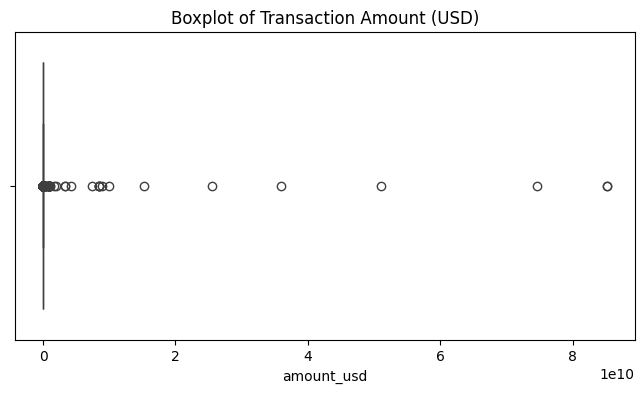

In [20]:
#CHECK FOR OUTLIERS

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df_transactions["amount_usd"])
plt.title("Boxplot of Transaction Amount (USD)")
plt.show()

In [21]:
df_transactions["amount_usd"].describe()

,amount_usd
count,2.740075e+06
mean,1.703225e+05
std,9.634014e+07
min,0.000000e+00
25%,2.030000e+00
50%,8.510000e+00
75%,2.822000e+01
max,8.510645e+10


In [22]:
#df_transactions["amount_usd"] = df_transactions["amount_usd"].clip(upper=100)

In [23]:
#df_transactions = df_transactions[df_transactions["amount_usd"] < 70]

In [24]:
#CLEANING THE OUTLIERS

#Q1 = df_transactions["amount_usd"].quantile(0.25)
#Q3 = df_transactions["amount_usd"].quantile(0.75)
#IQR = Q3 - Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#lower_bound, upper_bound

#df_transactions_clean = df_transactions[
 #   (df_transactions["amount_usd"] >= lower_bound) &
 #   (df_transactions["amount_usd"] <= upper_bound)]

 #sns.boxplot(x=df_transactions_clean["amount_usd"])
#plt.title("Transaction Amount")
#plt.show()




In [25]:

# =========================
# 1. IQR calculation
# =========================
Q1 = df_transactions["amount_usd"].quantile(0.25)
Q3 = df_transactions["amount_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_1 = Q1 - 1.5 * IQR
upper_1 = Q3 + 1.5 * IQR

lower_2 = Q1 - 3 * IQR
upper_2 = Q3 + 3 * IQR

# =========================
# 2. Create NEW dataframe
# =========================

df_transactions["outlier_level"] = "normal"

df_transactions.loc[
    (df_transactions["amount_usd"] < lower_1) | (df_transactions["amount_usd"] > upper_1),
    "outlier_level"
] = "mild"

df_transactions.loc[
    (df_transactions["amount_usd"] < lower_2) | (df_transactions["amount_usd"] > upper_2),
    "outlier_level"
] = "extreme"


In [26]:
df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country,outlier_level
0,transaction_505,topup,aed,298.62,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_4773,20180802_0941074263630000,Not Applicable,extreme
1,transaction_1755379,exchange,aed,3.51,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_10435,20180906_1023158071480000,Not Applicable,normal
2,transaction_1667,exchange,aed,0.05,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_397,20180516_0609280630370000,Not Applicable,normal
3,transaction_1429,exchange,aed,24.14,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_4399,20181219_2022035501300000,Not Applicable,normal
4,transaction_345,exchange,aed,0.21,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_1731,20181027_1329565248260000,Not Applicable,normal


In [27]:
df_transactions["outlier_level"].value_counts(normalize=True) * 100


,proportion
outlier_level,
normal,86.032901
extreme,8.907128
mild,5.059971


In [28]:
df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country,outlier_level
0,transaction_505,topup,aed,298.62,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_4773,20180802_0941074263630000,Not Applicable,extreme
1,transaction_1755379,exchange,aed,3.51,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_10435,20180906_1023158071480000,Not Applicable,normal
2,transaction_1667,exchange,aed,0.05,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_397,20180516_0609280630370000,Not Applicable,normal
3,transaction_1429,exchange,aed,24.14,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_4399,20181219_2022035501300000,Not Applicable,normal
4,transaction_345,exchange,aed,0.21,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_1731,20181027_1329565248260000,Not Applicable,normal


In [29]:
df_transactions['created_date'] = (
    df_transactions['created_date']
    .astype(str)
    .str.extract(r'(\d{8}_\d{6})')[0]
)

df_transactions['created_date'] = pd.to_datetime(
    df_transactions['created_date'],
    format='%Y%m%d_%H%M%S',
    errors='coerce'
)

In [30]:
df_completed = df_transactions[
    df_transactions['transactions_state'] == 'completed'
]
user_features = df_completed.groupby('user_id').agg(
    total_transactions=('transaction_id','count'),
    avg_transaction_amount=('amount_usd','mean'),
    last_transaction_date=('created_date','max')
).reset_index()

In [31]:
reference_date = df_completed['created_date'].max()

In [32]:
user_features['days_since_last_transaction'] = (
    reference_date - user_features['last_transaction_date']
).dt.days

In [33]:
user_activity_span = df_completed.groupby('user_id')['created_date'].agg(['min','max']).reset_index()

user_activity_span['activity_days'] = (
    user_activity_span['max'] - user_activity_span['min']
).dt.days + 1

In [34]:
user_features = user_features.merge(
    user_activity_span[['user_id','activity_days']],
    on='user_id',
    how='left'
)

In [35]:
user_features['transaction_frequency'] = (
    user_features['total_transactions'] /
    user_features['activity_days']
)

In [36]:
user_features.head()

,user_id,total_transactions,avg_transaction_amount,last_transaction_date,days_since_last_transaction,activity_days,transaction_frequency
0,user_0,350,36.138857,2019-05-02 03:38:44,13,471,0.743100
1,user_1,114,50.046930,2019-02-24 21:25:15,79,390,0.292308
2,user_10,846,28.969716,2019-05-11 11:01:00,4,493,1.716024
3,user_100,110,146.419818,2019-05-07 13:00:24,8,477,0.230608
4,user_1000,35,575.094571,2018-06-26 05:00:42,323,171,0.204678


In [39]:
user_features.to_csv("user_features.csv",index=False,encoding="utf-8")

from google.colab import files
files.download("user_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
df_transactions.to_csv("df_transactions.csv",index=False,encoding="utf-8")

from google.colab import files
files.download("df_transactions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>